In [33]:
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split


In [8]:
!pip install numpy
!pip install opencv-python
!pip install tensorflow
!pip install keras
!pip install tqdm
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.8 MB/s eta 0:00:00


In [34]:
!pip3 show os

320

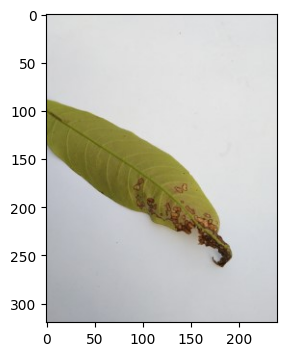

In [35]:
#Antrac
img1 = cv2.imread('dataset_Mongo_train_testMain/test/Anthracnose/IMG_20211011_160609 (Custom).jpg')
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)

# He
# img2 = cv2.imread('/content/drive/MyDrive/dataset_Mongo_train_test/train/Healthy/20211231_123243 (Custom).jpg')
# img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(img1)
# plt.subplot(122),plt.imshow(img2)
len(img1)

# Preprocessing


In [44]:
width = 224
num_classes = 2
trainpath = 'dataset_Mongo_train_testMain/train'
testpath = 'dataset_Mongo_train_testMain/test'
trainImg = [trainpath+f for f in listdir(trainpath)if listdir(join(trainpath,f))]
testImg = [testpath+f for f in listdir(testpath)if listdir(join(testpath,f))]
# trainImg = [trainpath+f for f in listdir(trainpath)]
# testImg = [testpath+f for f in listdir(testpath)]
# testImg = [testpath+f for f in listdir(testpath)if listdir(join(testpath,f))]

NotADirectoryError: [Errno 20] Not a directory: 'dataset_Mongo_train_testMain/train/.DS_Store'

In [25]:
trainImg , testImg

(['dataset_Mongo_train_testMain/trainAnthracnose',
  'dataset_Mongo_train_testMain/train.DS_Store',
  'dataset_Mongo_train_testMain/trainHealthy'],
 ['dataset_Mongo_train_testMain/testAnthracnose',
  'dataset_Mongo_train_testMain/test.DS_Store',
  'dataset_Mongo_train_testMain/testHealthy'])

In [26]:
def img2data(path):
    rawImgs = []
    labels = []
    c = 0

    for label, imagePath in enumerate(path):
        for item in tqdm(os.listdir(imagePath)):
            file = os.path.join(imagePath, item)
            c += 1
            if 'Anthracnose' in file:
                labels.append([1, 0])
            elif 'Healthy' in file:
                labels.append([0, 1])
            img = cv2.imread(file, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (width, width))
            rawImgs.append(img)

    return rawImgs, labels

In [28]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_Mongo_train_testMain/trainAnthracnose'

In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((700, 224, 224, 3), (700, 2), (300, 224, 224, 3), (300, 2))

In [8]:
x_train

array([[[[0.8901961 , 0.8980392 , 0.9019608 ],
         [0.89411765, 0.9019608 , 0.90588236],
         [0.89411765, 0.9019608 , 0.90588236],
         ...,
         [0.9254902 , 0.9372549 , 0.9529412 ],
         [0.91764706, 0.92941177, 0.94509804],
         [0.9137255 , 0.9254902 , 0.9411765 ]],

        [[0.8862745 , 0.89411765, 0.8980392 ],
         [0.8901961 , 0.8980392 , 0.9019608 ],
         [0.8901961 , 0.8980392 , 0.9019608 ],
         ...,
         [0.93333334, 0.94509804, 0.9607843 ],
         [0.9254902 , 0.9372549 , 0.9529412 ],
         [0.91764706, 0.92941177, 0.94509804]],

        [[0.8862745 , 0.89411765, 0.8980392 ],
         [0.8862745 , 0.89411765, 0.8980392 ],
         [0.8901961 , 0.8980392 , 0.9019608 ],
         ...,
         [0.9372549 , 0.9490196 , 0.9647059 ],
         [0.92941177, 0.9411765 , 0.95686275],
         [0.92156863, 0.93333334, 0.9490196 ]],

        ...,

        [[0.62352943, 0.68235296, 0.69411767],
         [0.62352943, 0.68235296, 0.69411767]

#building the model Deeplearning


In [13]:
model = Sequential([
        Conv2D(224, (3,3), activation='relu', input_shape=(width, width, 3)),
        MaxPool2D(pool_size=(2,2)),
        # Dropout(0.25),
        Conv2D(224,(3,3) , activation='relu'),
        MaxPool2D(pool_size=(2,2 )),
        Flatten(),
        Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
    ])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 224)     6272      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 224)     0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 224)     451808    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 224)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 653184)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
batch_size = 32
epochs = 5
model

In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/5
18/22 [=======================>......] - ETA: 2:02 - loss: 2.9068 - accuracy: 0.4931

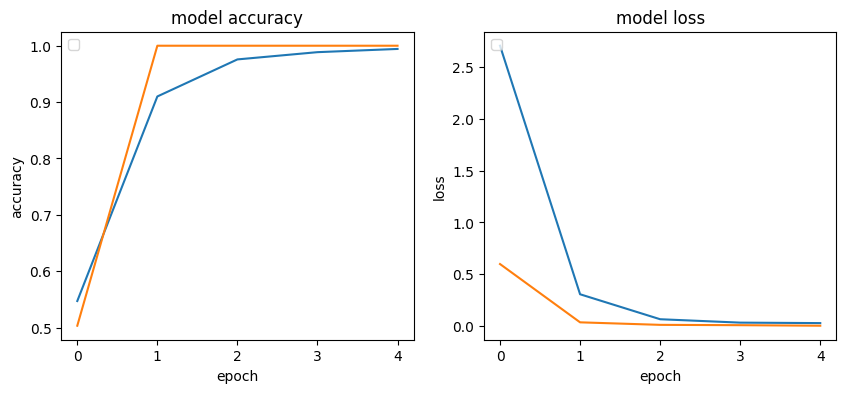

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121),
plt.title('model accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy']);plt.plot(history.history['val_accuracy'])

plt.subplot(122)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss']);plt.plot(history.history['val_loss'])


1/1 [==============================] - 0s 20ms/step
[[0.9986687  0.00133137]]
real:20211011_133805-Custom-_jpg.rf.91decee1fd9c3804b197d9eb7a48c43a.jpg
predict:Anthracnose


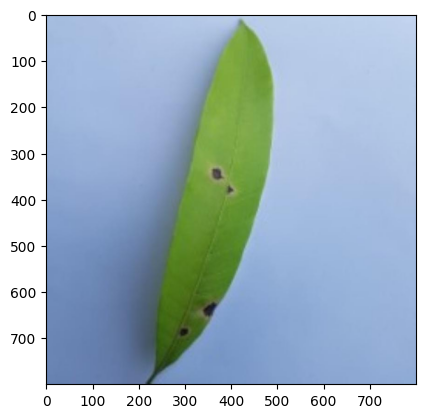

1/1 [==============================] - 0s 20ms/step
[[0.37745813 0.6225419 ]]
real:qc91zh5c70ciNO4vwEc-o.jpg
predict:Healthy


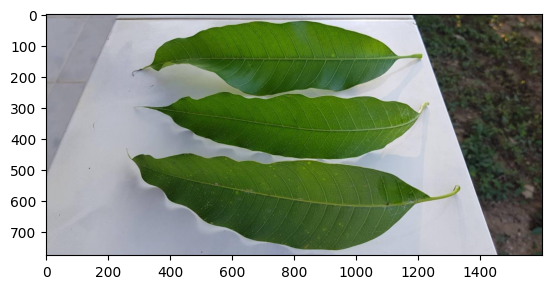

1/1 [==============================] - 0s 18ms/step
[[1.0000000e+00 1.7378195e-08]]
real:a52_1.png
predict:Anthracnose


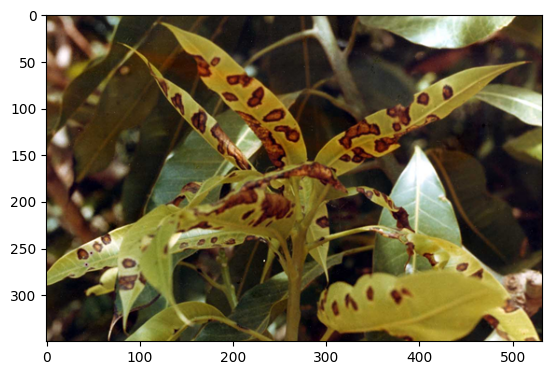

1/1 [==============================] - 0s 38ms/step
[[0.1163182 0.8836818]]
real:d87a2d9f1ab886e2e1755135eac8a9920f768adb.jpeg
predict:Healthy


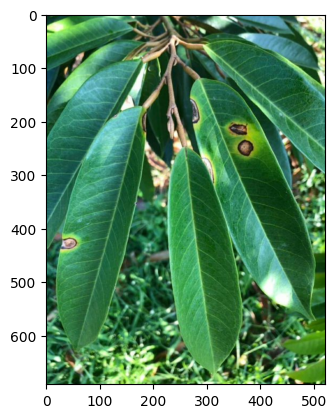

In [ ]:
testpath = '/content/drive/MyDrive/testdataaaaa/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":

          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,224,224,3))
          predict = model.predict(rimg)
          label = ['Anthracnose','Healthy']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          plt.imshow(ori)
          plt.show()

